# Data Visualisation of Results

This Python notebook is to visualize the results from the experiments conducted. All methods were validated using Stratified 10 Fold Sampling

## Classifiers 

The following classifiers were used:

- Random Forest with 100 trees
- Support Vector Machine (LinearSVC from sklearn)
- Naive Bayes (Gaussian Naive Bayes)

## Methods 

The following methods for classification were used:

- Bag-Of-Words
- Average Sentence
- Average Words
- Average Words + TFIDF
- Average Words + Mean Similarity (Hybrid Approach)
- Average Words + Mean Similarity + TFIDF (Hybrid Approach)
- Word Feature
- Word Feature + Mean Similarity

## Evaluation Metrics

The following evaluation metrics were taken under consideration:

- Accuracy
- Precision
- False Discovery Rate
- False Positive Rate
- Area Under Curve (AUC) 
- Logarithmic Loss (Log Loss)
- Brier Score Loss
- Run Time for test set

The Standard Deviation for all metrics were also taken into consideration

In [1]:
# Load Excel File using Pandas
import pandas as pd

xls = pd.ExcelFile("C:/Users/MyPC/Desktop/FYP/Results (Stratified 10 Fold).xlsx")

In [2]:
# Verify the sheets(workbooks)

xls.sheet_names

['Accuracy',
 'Precision',
 'FDR',
 'FPR',
 'AUC',
 'Log Loss',
 'Brier Score',
 'Run Time']

In [3]:
# Load the libraries (ONLY ONCE)
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
%matplotlib inline

# Confusion Matrix

In [188]:
# Function to plot confusion matrix
import pickle

def plotConfusionMatrix(file_name, method):
    
    # Load the file
    cm_dict = pickle.load(open(file_name,"rb"))
    
    # Confusion Matrix form:
    # TP FN
    # FP TN
    row_one = [cm_dict['tp'], cm_dict['fn']]
    row_two = [cm_dict['fp'], cm_dict['tn']]
    
    confusion_matrix = [row_one, row_two]
    
    # Labels for the confusion matrix
    labels = ["Positive","Negative"]
    
    # Create Dataframe for the confusion matrix
    df_cm = pd.DataFrame(confusion_matrix, index = [label for label in labels],
                  columns = [label for label in labels])
    
    # Matplotlib variables
    FONT_SIZE = 15
    PADDING = 40
    title = method
    tick_marks = np.arange(len(labels))
    
    # Create Heatmap using Seaborne library
    plt.figure(figsize = (3,3))
    plt.xlabel("...", labelpad=PADDING)
    plt.ylabel("...", labelpad=PADDING)
    plt.figtext(.45,.95,title, fontsize=FONT_SIZE, ha='center')
    
    sns.heatmap(df_cm, annot=True, fmt="d", linewidths=.5, cmap="RdBu_r")

In [189]:
# Load the confusion matrix directory
import os

# Show the directory
DIR = "C:/Users/MyPC/Desktop/FYP/Confusion Matrix"

# Load all files and save in a variable
FILES = os.listdir(DIR)

In [190]:
# Function to display all the confusion Matrix
def displayConfusionMatrix(model_abb):
    
    # Get the files first
    files = [ file for file in FILES if file.startswith(model_abb)]

    for file in files:
        
        # Plot using heatmap
        plotConfusionMatrix(DIR + "/" + file, file.replace(".pk",""))

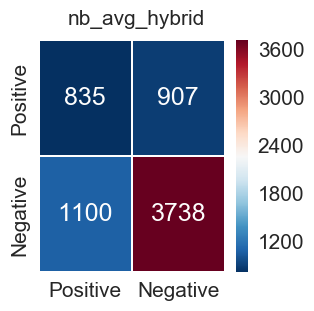

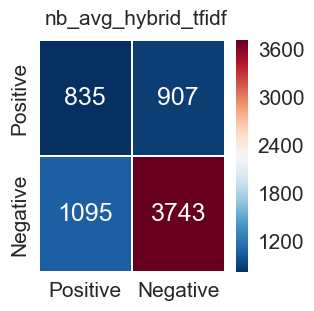

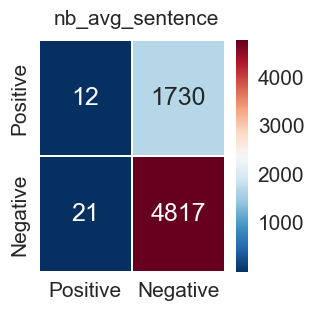

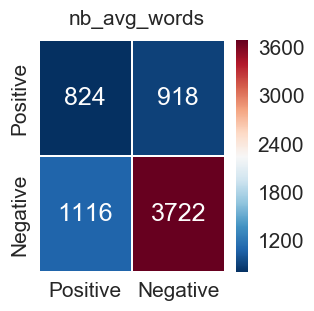

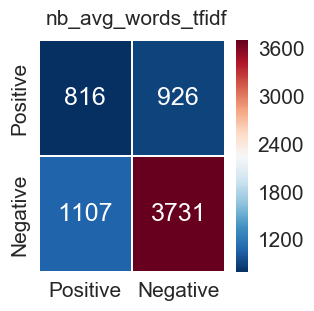

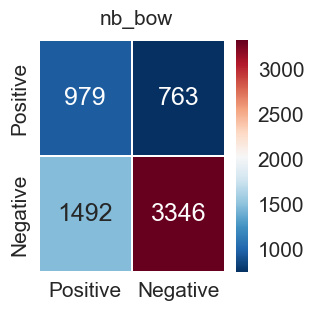

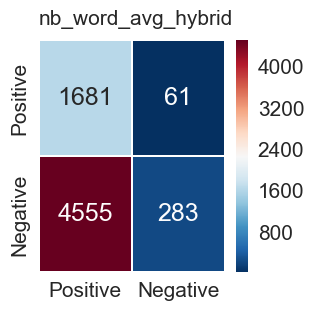

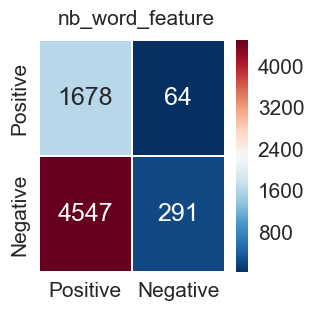

In [191]:
# NAIVE BAYES
        
displayConfusionMatrix('nb')

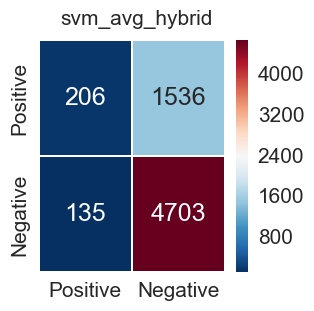

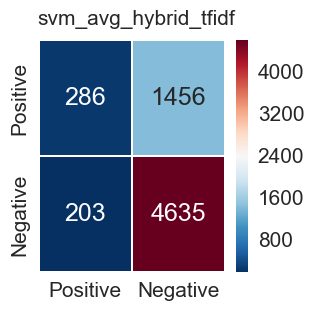

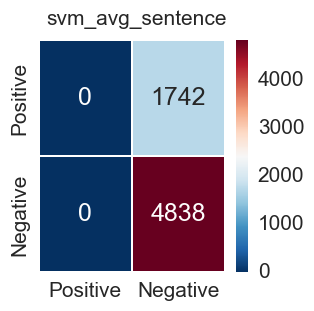

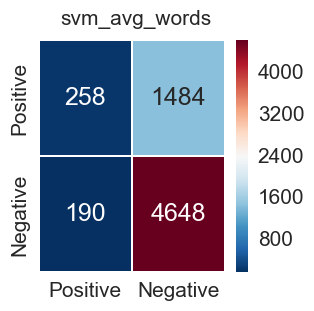

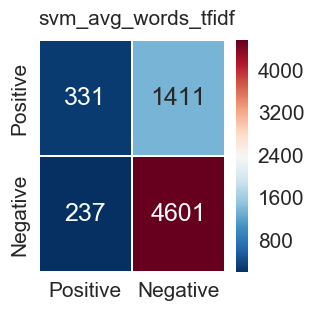

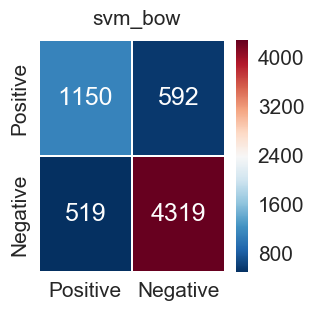

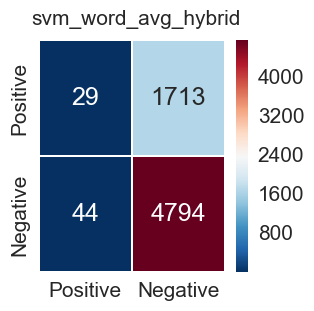

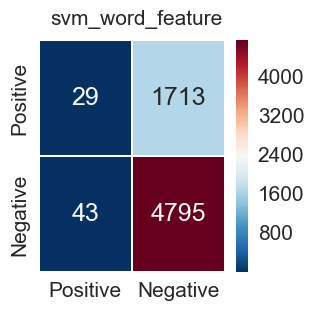

In [192]:
# SUPPORT VECTOR MACHINES

displayConfusionMatrix('svm')

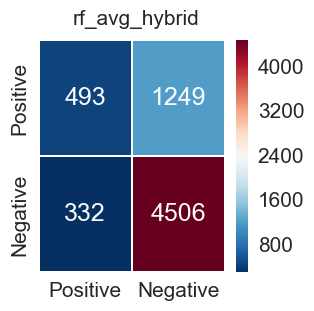

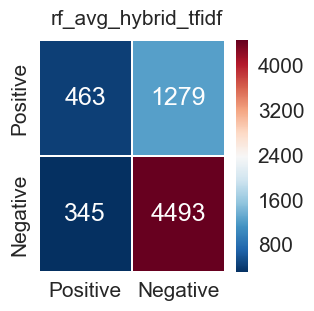

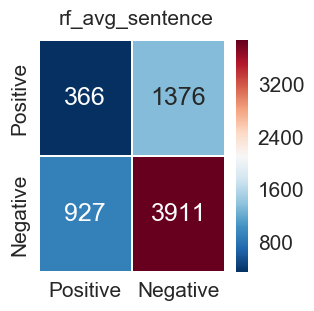

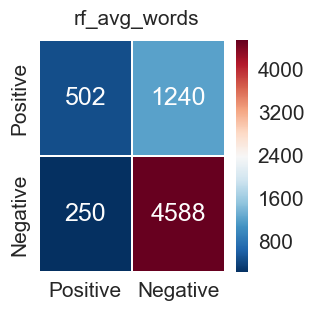

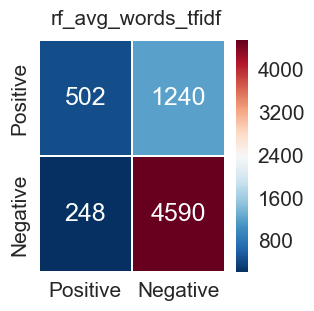

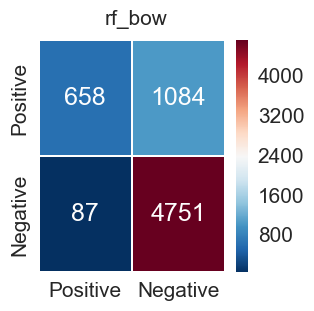

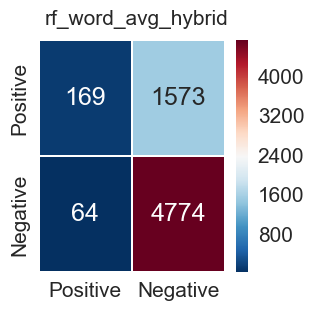

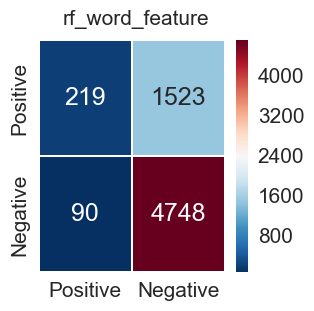

In [193]:
# RANDOM FOREST

displayConfusionMatrix('rf')

In [175]:
# Function to standardize the given dataframe and return the standard dataframe

def standardizeDataFrame(df):
    
    # Table to store dictionaries
    format_table = []
    
    # Lower Case the columns' name
    df.columns = map(str.lower, df.columns)
    
    # Classifier Array
    clf_dict = {"Naive Bayes": "nb",
                "SVM": "svm",
                "Random Forest": "rf"}
    
    # Loop classifier by classifier
    # Then get the results along with the standard deviation
    for key, value in clf_dict.items():
        
        for i, method in enumerate(df['method']):
            
            format_table.append({'method': method,
                         'model': key,
                         'value': df[value][i],
                         'std': df[value + " (std)"][i]})
            
    
    # Overwrite the table
    df = pd.DataFrame(format_table)
    
    return df

In [176]:
# Function to create point plot for the given metric
def createPointPlot(df, title, legend_loc):
    
    # Recreate the title
    title = title + " Scores"
    
    # Plot for Accuracy (Bar Chart)
    plt.figure(figsize=(20,8))

    # Dataframe-related
    clf_list = df['model'].unique()

    # Matplotlib variables
    FONT_SIZE = 30
    PADDING = 40

    fig = sns.pointplot(x='method', y='value', hue='model', palette="muted",
                        data=df[df.model.map(lambda x: x in clf_list)])


    plt.rc('axes', labelsize=FONT_SIZE)
    plt.rc('axes', titlesize=FONT_SIZE)
    plt.xlabel("...", labelpad=PADDING)
    plt.ylabel("...", labelpad=PADDING)
    plt.figtext(.5,.95,title, fontsize=FONT_SIZE, ha='center')
    plt.grid(True)

    sns.set_context("notebook", font_scale=1.5)

    fig.set(ylabel=title)
    fig.set(xlabel="Method")
    fig.axes.legend(loc=legend_loc, prop={'size': 20})

# Accuracy


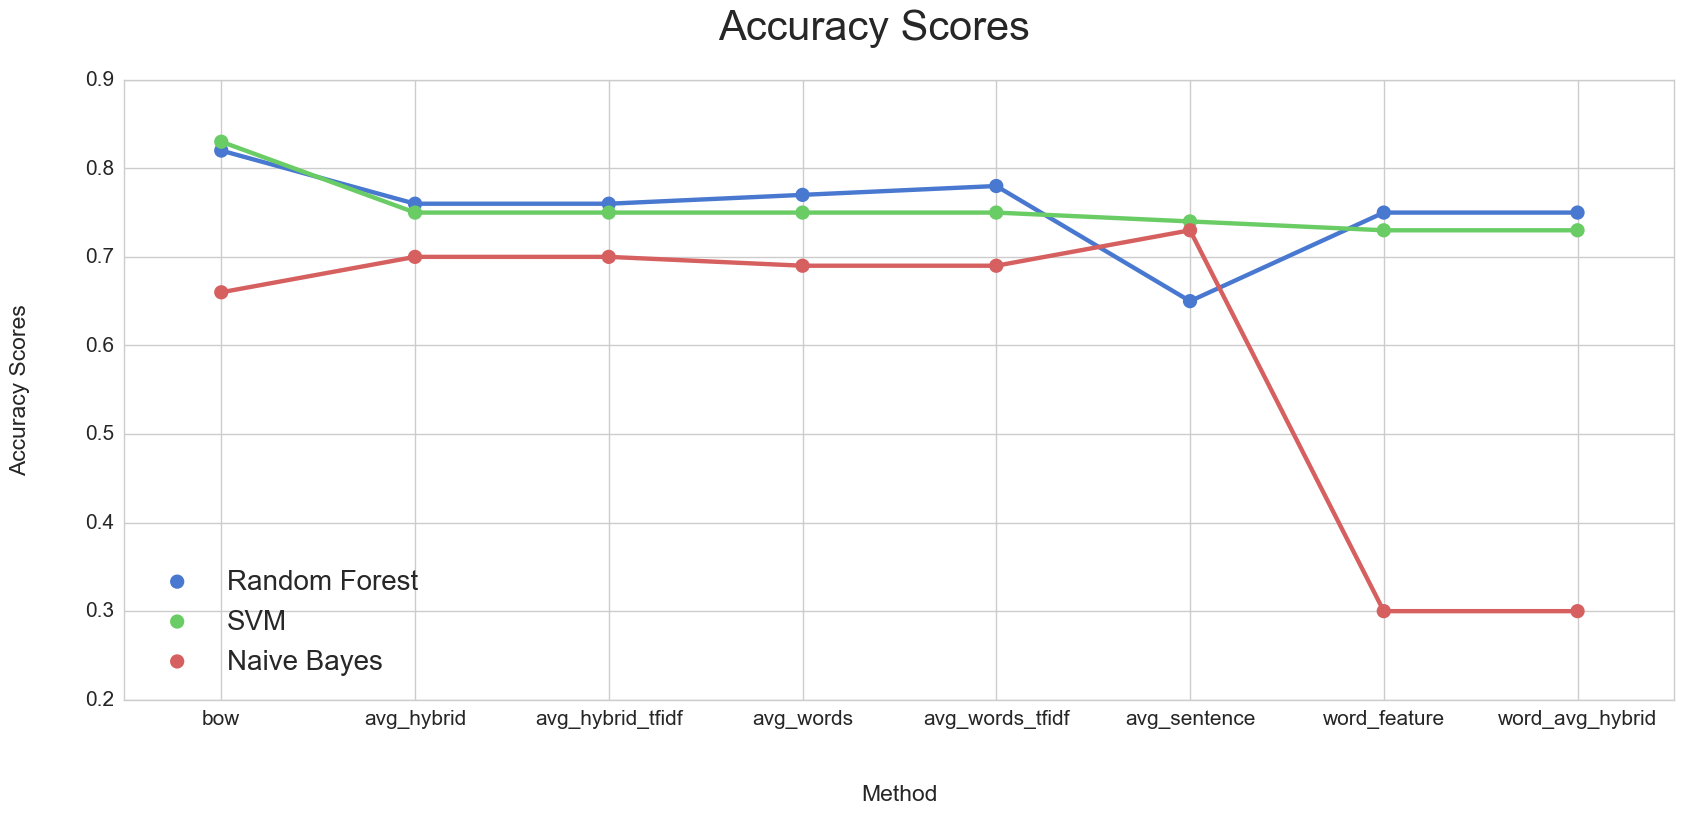

,Method,SVM,SVM (STD),NB,NB (STD),RF,RF (STD)
0,bow,0.83,0.01,0.66,0.01,0.82,0.01
1,avg_hybrid,0.75,0.01,0.70,0.02,0.76,0.01
2,avg_hybrid_tfidf,0.75,0.01,0.70,0.01,0.76,0.01
3,avg_words,0.75,0.01,0.69,0.01,0.77,0.01
4,avg_words_tfidf,0.75,0.01,0.69,0.01,0.78,0.01
5,avg_sentence,0.74,0.00,0.73,0.00,0.65,0.02
6,word_feature,0.73,0.00,0.30,0.01,0.75,0.01
7,word_avg_hybrid,0.73,0.00,0.30,0.01,0.75,0.01


In [178]:
# Parse the accuracy sheet
# Transform the sheet into a standard dataframe
# Then, create the plot and display the results

transformed_df = standardizeDataFrame(xls.parse('Accuracy'))
normal_df = xls.parse('Accuracy')

# Create the point plot
createPointPlot(transformed_df, 'Accuracy', 'lower left')

# Show the plot and the results in table
plt.show()
normal_df

# Precision

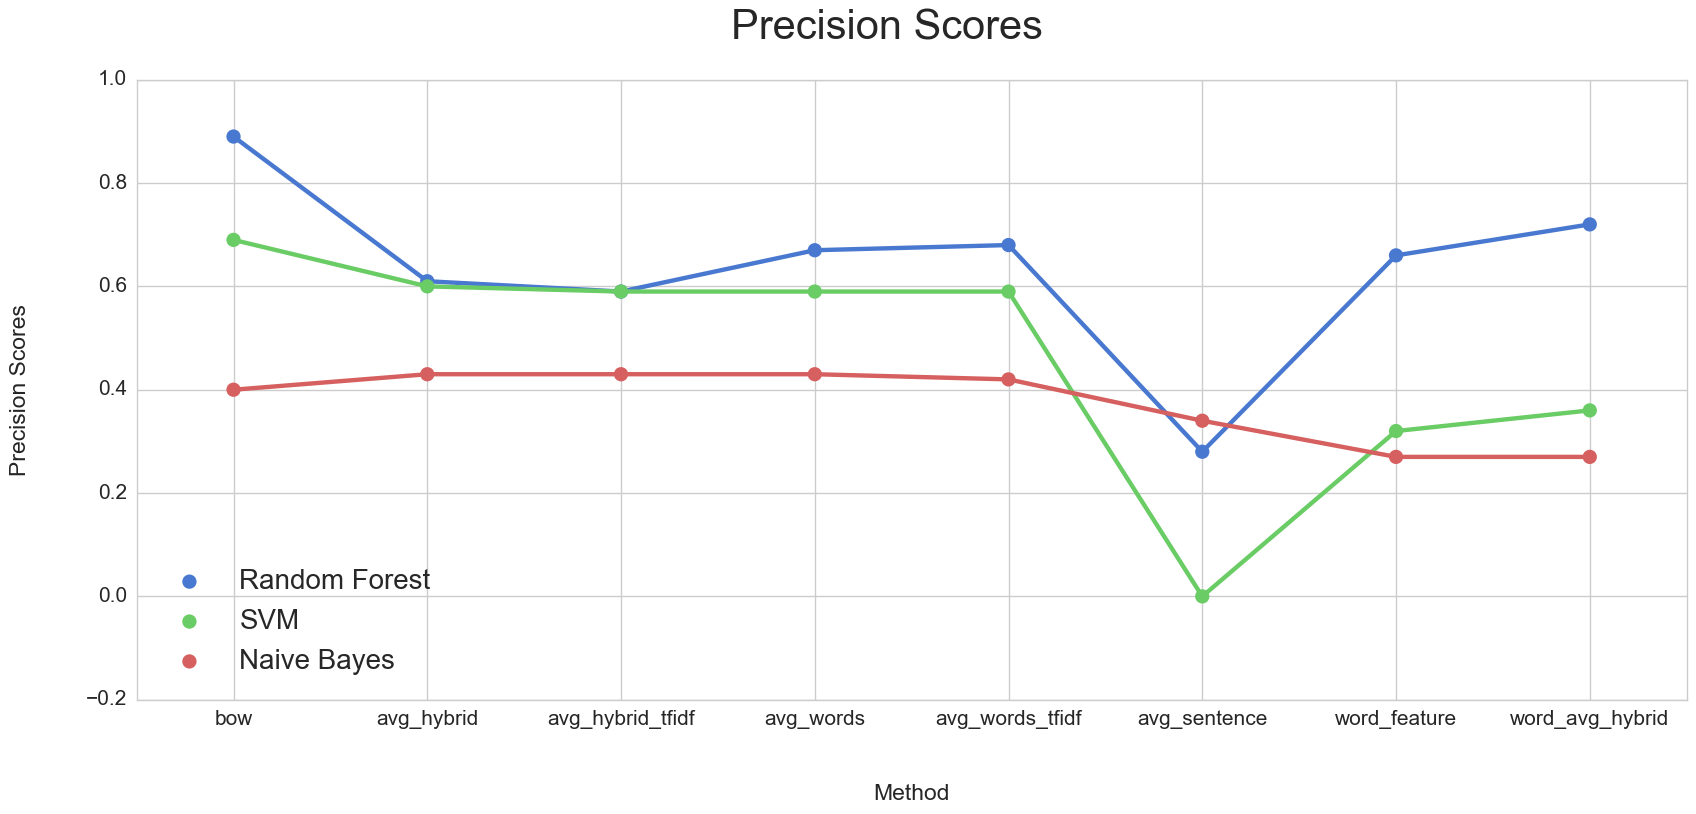

,Method,SVM,SVM (STD),NB,NB (STD),RF,RF (STD)
0,bow,0.69,0.02,0.40,0.02,0.89,0.03
1,avg_hybrid,0.60,0.08,0.43,0.03,0.61,0.05
2,avg_hybrid_tfidf,0.59,0.06,0.43,0.02,0.59,0.05
3,avg_words,0.59,0.07,0.43,0.02,0.67,0.05
4,avg_words_tfidf,0.59,0.06,0.42,0.02,0.68,0.03
5,avg_sentence,0.00,0.00,0.34,0.30,0.28,0.04
6,word_feature,0.32,0.23,0.27,0.00,0.66,0.09
7,word_avg_hybrid,0.36,0.24,0.27,0.00,0.72,0.14


In [179]:
# Parse the precision sheet
# Transform the sheet into a standard dataframe
# Then, create the plot and display the results

transformed_df = standardizeDataFrame(xls.parse('Precision'))
normal_df = xls.parse('Precision')

# Create the point plot
createPointPlot(transformed_df, 'Precision', 'lower left')

# Show the plot and the results in table
plt.show()
normal_df

# False Discovery Rate (FDR)

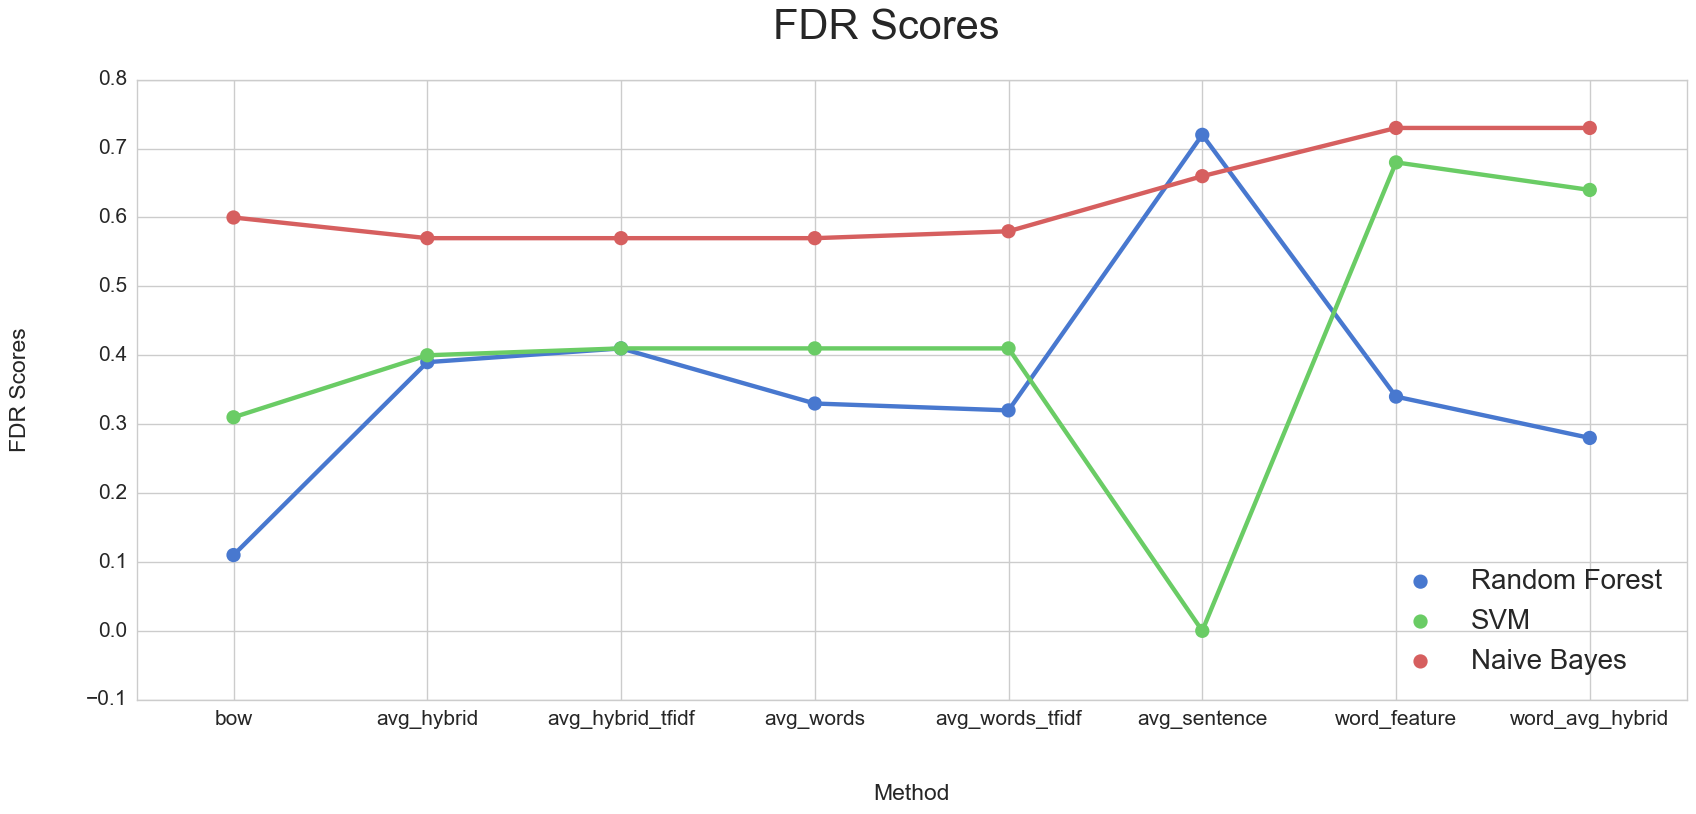

,Method,SVM,SVM (STD),NB,NB (STD),RF,RF (STD)
0,bow,0.31,0.02,0.60,0.02,0.11,0.03
1,avg_hybrid,0.40,0.08,0.57,0.03,0.39,0.05
2,avg_hybrid_tfidf,0.41,0.06,0.57,0.02,0.41,0.05
3,avg_words,0.41,0.07,0.57,0.02,0.33,0.05
4,avg_words_tfidf,0.41,0.06,0.58,0.02,0.32,0.03
5,avg_sentence,0.00,0.00,0.66,0.30,0.72,0.04
6,word_feature,0.68,0.23,0.73,0.00,0.34,0.09
7,word_avg_hybrid,0.64,0.24,0.73,0.00,0.28,0.14


In [180]:
# Parse the accuracy sheet
# Transform the sheet into a standard dataframe
# Then, create the plot and display the results

transformed_df = standardizeDataFrame(xls.parse('FDR'))
normal_df = xls.parse('FDR')

# Create the point plot
createPointPlot(transformed_df, 'FDR', 'lower right')

# Show the plot and the results in table
plt.show()
normal_df

# False Positive Rate (FPR)

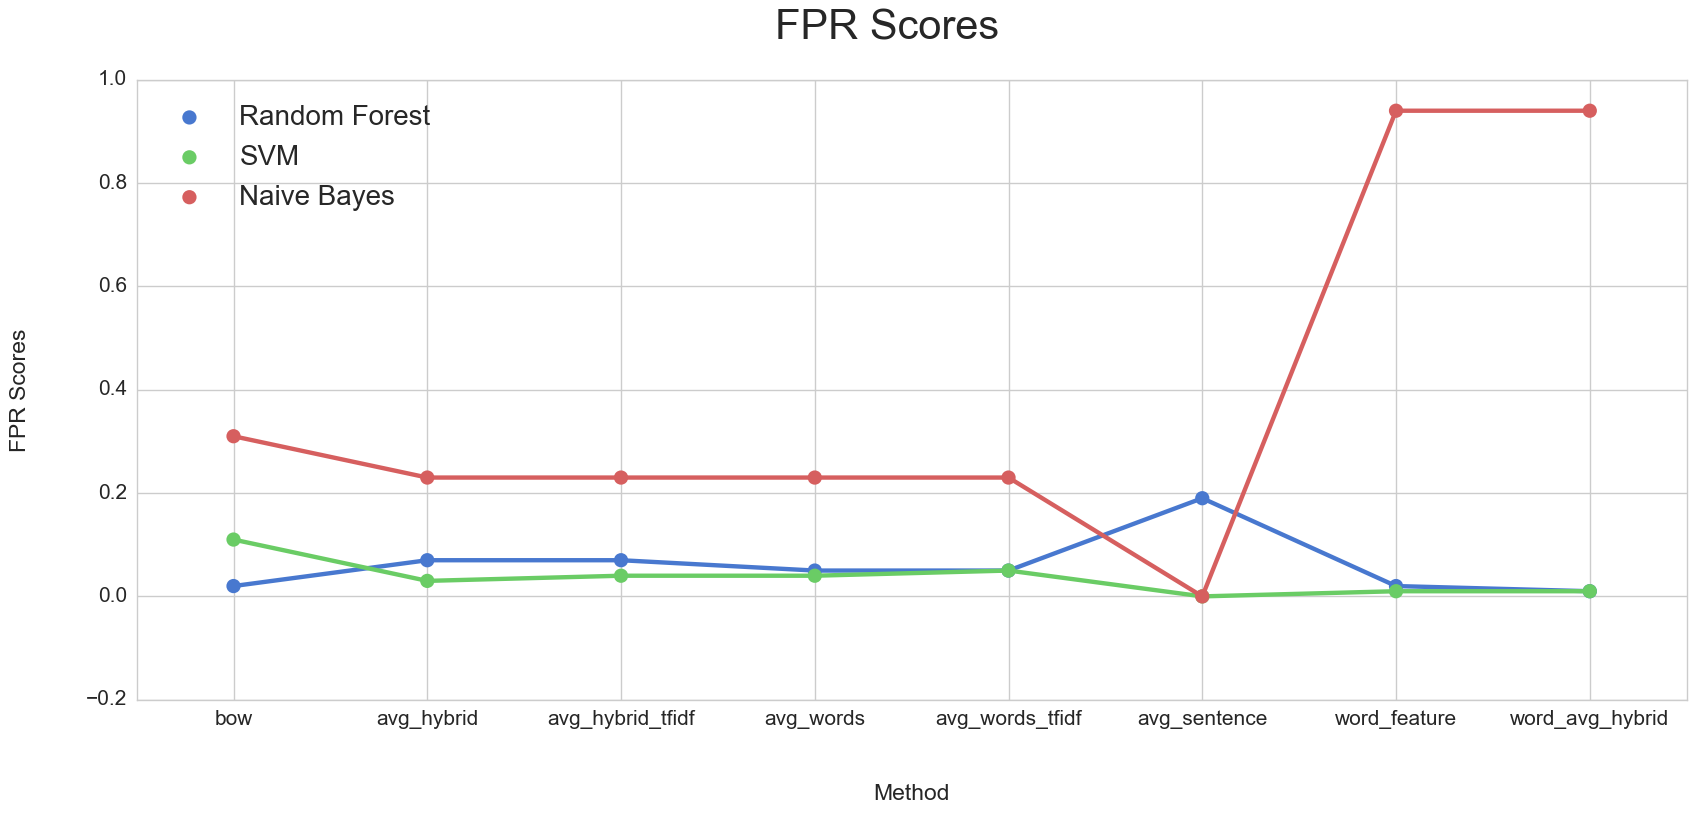

,Method,SVM,SVM (STD),NB,NB (STD),RF,RF (STD)
0,bow,0.11,0.01,0.31,0.01,0.02,0.01
1,avg_hybrid,0.03,0.01,0.23,0.02,0.07,0.01
2,avg_hybrid_tfidf,0.04,0.01,0.23,0.01,0.07,0.01
3,avg_words,0.04,0.01,0.23,0.02,0.05,0.01
4,avg_words_tfidf,0.05,0.01,0.23,0.01,0.05,0.01
5,avg_sentence,0.00,0.00,0.00,0.00,0.19,0.03
6,word_feature,0.01,0.00,0.94,0.01,0.02,0.01
7,word_avg_hybrid,0.01,0.00,0.94,0.01,0.01,0.00


In [181]:
# Parse the accuracy sheet
# Transform the sheet into a standard dataframe
# Then, create the plot and display the results

transformed_df = standardizeDataFrame(xls.parse('FPR'))
normal_df = xls.parse('FPR')

# Create the point plot
createPointPlot(transformed_df, 'FPR', 'upper left')

# Show the plot and the results in table
plt.show()
normal_df

# Log Loss

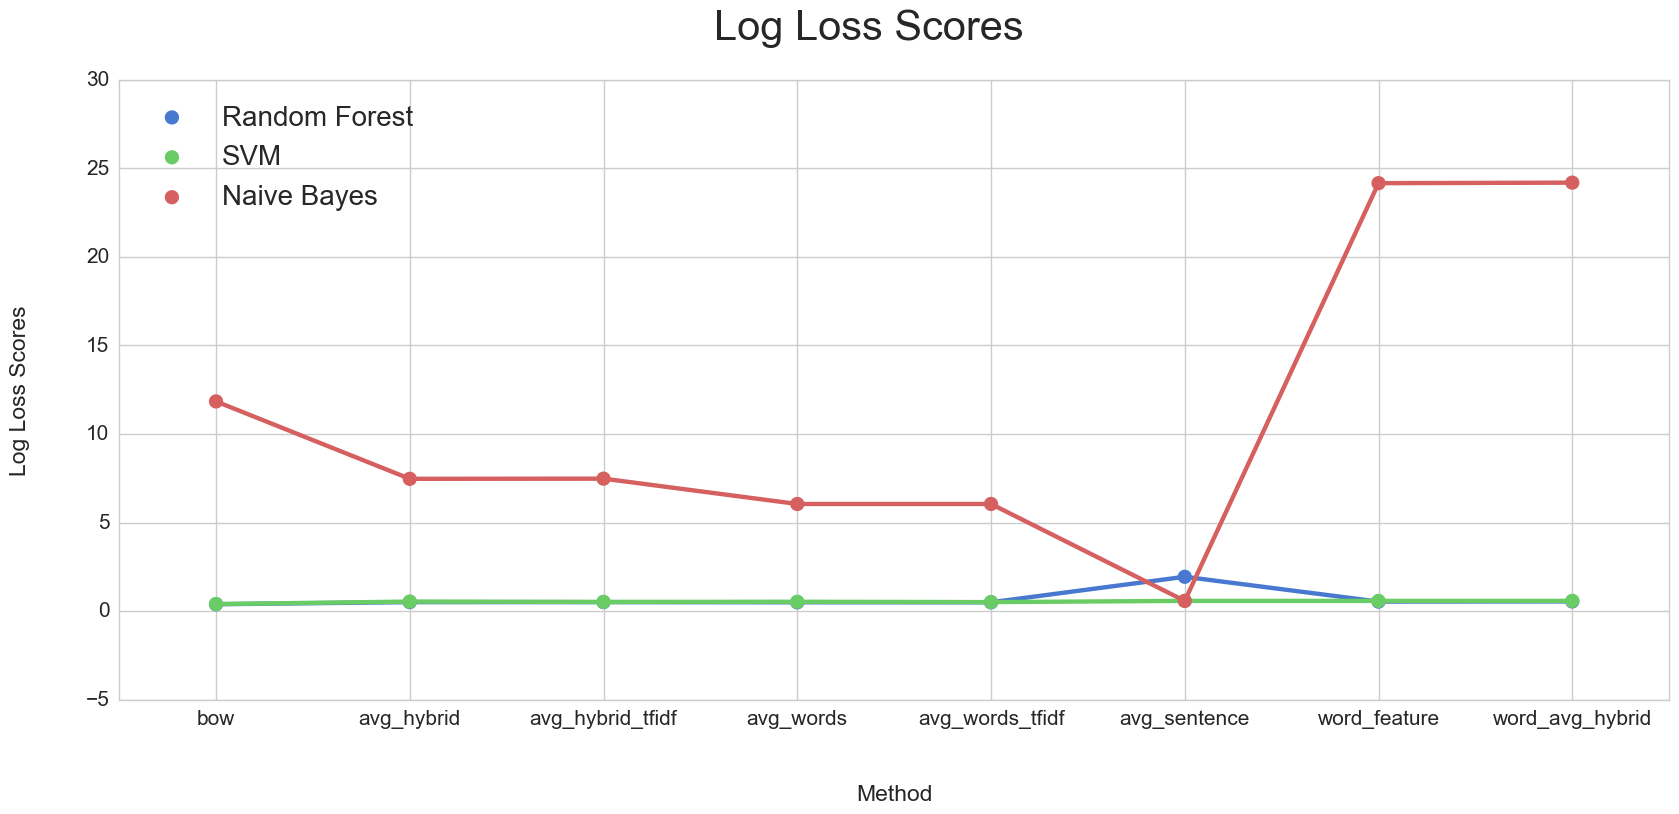

,Method,SVM,SVM (STD),NB,NB (STD),RF,RF (STD)
0,bow,0.40,0.03,11.84,0.50,0.39,0.02
1,avg_hybrid,0.54,0.01,7.47,0.57,0.51,0.02
2,avg_hybrid_tfidf,0.52,0.01,7.48,0.49,0.51,0.03
3,avg_words,0.53,0.00,6.05,0.41,0.50,0.02
4,avg_words_tfidf,0.51,0.02,6.05,0.39,0.50,0.02
5,avg_sentence,0.58,0.00,0.58,0.00,1.94,0.19
6,word_feature,0.58,0.00,24.16,0.35,0.54,0.01
7,word_avg_hybrid,0.58,0.00,24.19,0.25,0.55,0.01


In [182]:
# Parse the accuracy sheet
# Transform the sheet into a standard dataframe
# Then, create the plot and display the results

transformed_df = standardizeDataFrame(xls.parse('Log Loss'))
normal_df = xls.parse('Log Loss')

# Create the point plot
createPointPlot(transformed_df, 'Log Loss', 'upper left')

# Show the plot and the results in table
plt.show()
normal_df

# Brier Loss Score

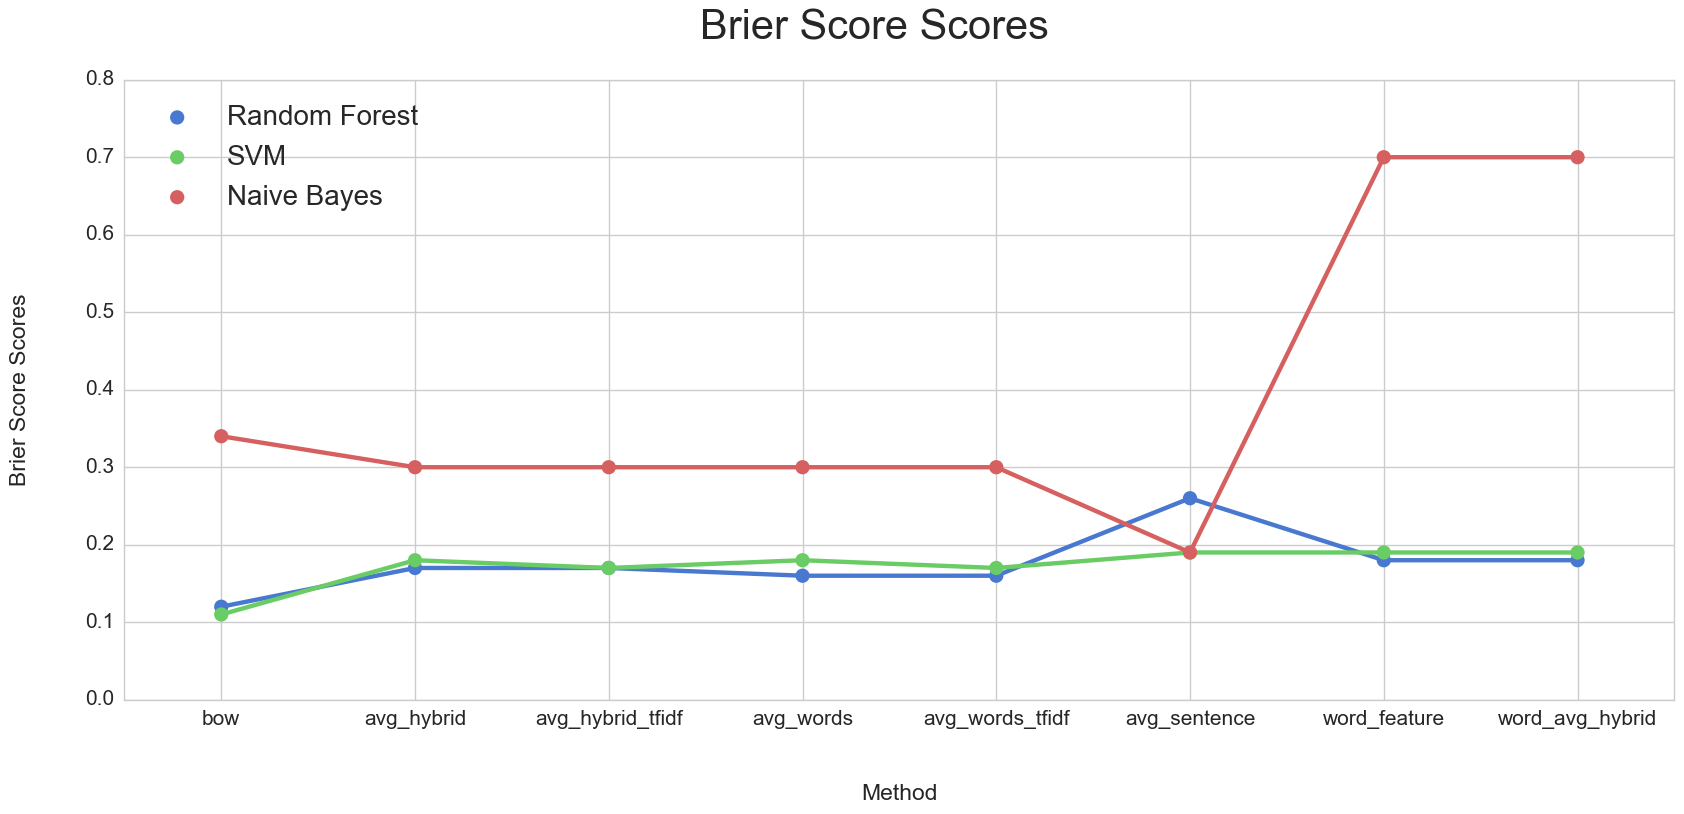

,Method,SVM,SVM (STD),NB,NB (STD),RF,RF (STD)
0,bow,0.11,0.01,0.34,0.01,0.12,0.00
1,avg_hybrid,0.18,0.00,0.30,0.02,0.17,0.00
2,avg_hybrid_tfidf,0.17,0.00,0.30,0.01,0.17,0.00
3,avg_words,0.18,0.00,0.30,0.01,0.16,0.01
4,avg_words_tfidf,0.17,0.01,0.30,0.01,0.16,0.00
5,avg_sentence,0.19,0.00,0.19,0.00,0.26,0.01
6,word_feature,0.19,0.00,0.70,0.00,0.18,0.00
7,word_avg_hybrid,0.19,0.00,0.70,0.01,0.18,0.00


In [183]:
# Parse the accuracy sheet
# Transform the sheet into a standard dataframe
# Then, create the plot and display the results

transformed_df = standardizeDataFrame(xls.parse('Brier Score'))
normal_df = xls.parse('Brier Score')

# Create the point plot
createPointPlot(transformed_df, 'Brier Score', 'upper left')

# Show the plot and the results in table
plt.show()
normal_df

# Run Time 

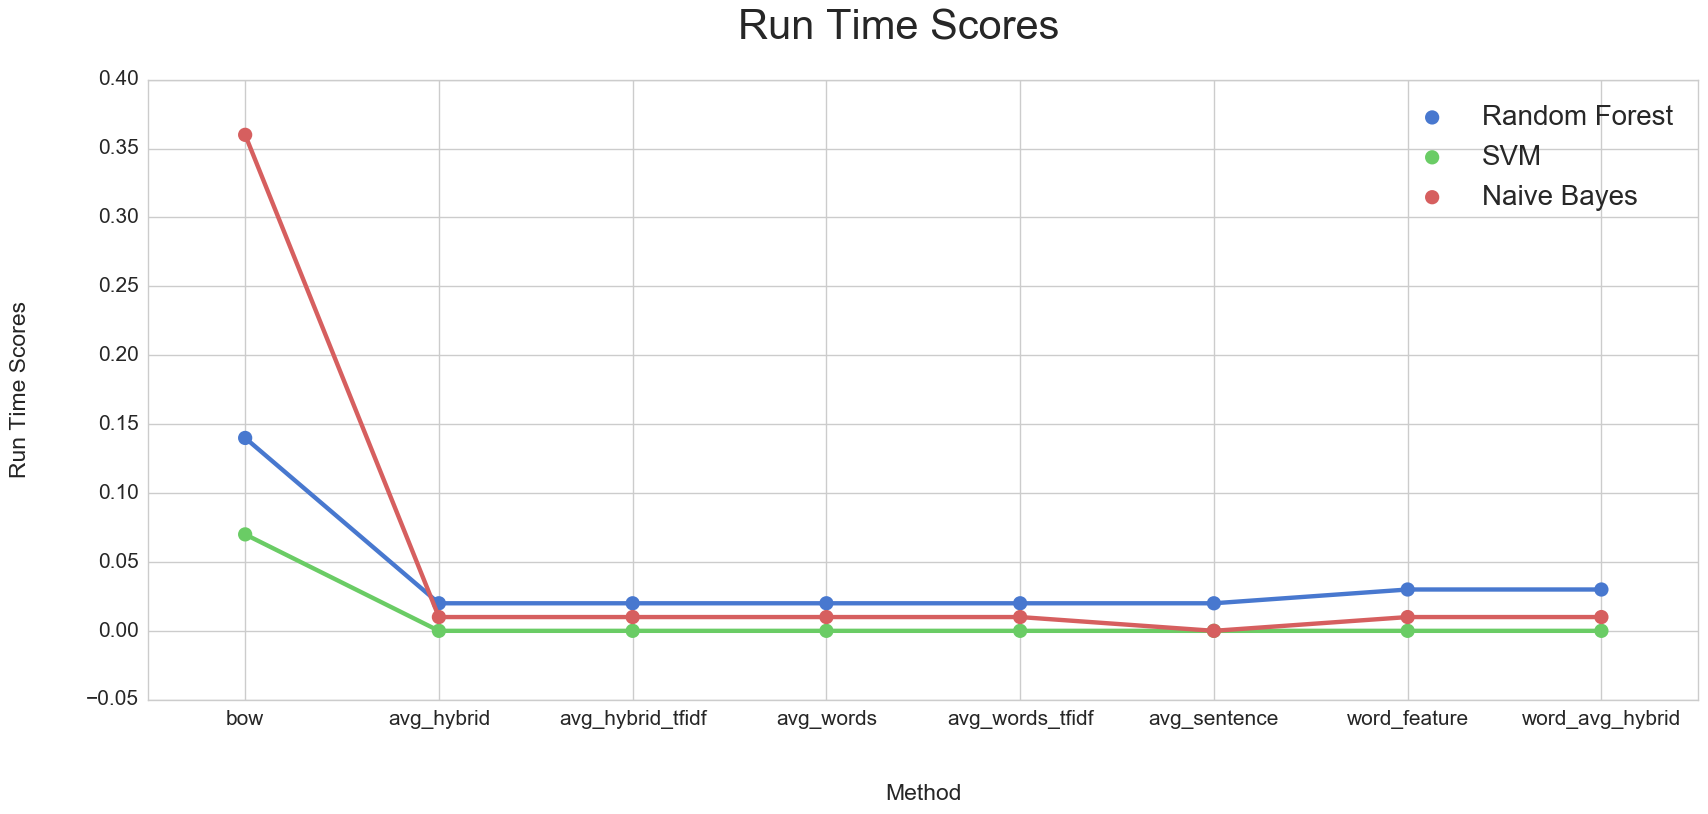

,Method,SVM,SVM (STD),NB,NB (STD),RF,RF (STD)
0,bow,0.07,0,0.36,0,0.14,0
1,avg_hybrid,0.00,0,0.01,0,0.02,0
2,avg_hybrid_tfidf,0.00,0,0.01,0,0.02,0
3,avg_words,0.00,0,0.01,0,0.02,0
4,avg_words_tfidf,0.00,0,0.01,0,0.02,0
5,avg_sentence,0.00,0,0.00,0,0.02,0
6,word_feature,0.00,0,0.01,0,0.03,0
7,word_avg_hybrid,0.00,0,0.01,0,0.03,0


In [184]:
# Parse the accuracy sheet
# Transform the sheet into a standard dataframe
# Then, create the plot and display the results

transformed_df = standardizeDataFrame(xls.parse('Run Time'))
normal_df = xls.parse('Run Time')

# Create the point plot
createPointPlot(transformed_df, 'Run Time', 'upper right')

# Show the plot and the results in table
plt.show()
normal_df